In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Questao 1

Implemente uma funcao que receba uma imagem em formato PPM, o tamanho n de um filtro espacial com dimensoes n × n e a matriz com os pesos do filtro, e aplique o filtro com uma convolucao, gerando e salvando a imagem resultante no disco em formato PPM. Voce nao pode usar a OpenCV em nenhum desses passos. As especificacoes do formato PPM podem ser encontradas aqui: https://netpbm.sourceforge.net/doc/ppm.html

In [2]:
def read_ppm(filename):
    with open(filename, 'rb') as f:
        header = f.readline().decode().strip()
        if header != 'P6':
            raise ValueError('Not a PPM file')
        width, height = map(int, f.readline().decode().strip().split())
        maxval = int(f.readline().decode().strip())
        data = np.fromfile(f, dtype=np.uint8).reshape((height, width, 3))
    return data

In [3]:
def write_ppm(filename, img):
    height, width, _ = img.shape
    with open(filename, 'wb') as f:
        f.write(b'P6\n')
        f.write(f'{width} {height}\n255\n'.encode())
        img.tofile(f)

In [4]:
def normalize(img):
    result = img.astype(np.float32)
    result -= result.min()
    result *= 255.0 / result.max()
    result = result.astype(np.uint8)
    return result

In [5]:
# resposta da questao 1:

def apply_filter_to_color_image(img, filter):
    height, width = img.shape[:2]
    filter_size = filter.shape[0]
    
    pad_size = filter_size // 2
    #padded_img = np.pad(img, ((pad_size, pad_size), (pad_size, pad_size), (0, 0)), mode='constant')
    padded_img = np.pad(img, ((pad_size, pad_size), (pad_size, pad_size), (0, 0)), mode='edge')
    
    result = np.empty_like(img)
    for i in range(height):
        for j in range(width):
            for k in range(3):
                result[i, j, k] = np.sum(filter * padded_img[i:i+filter_size, j:j+filter_size, k])
                    
    return normalize(result)

def apply_filter_to_grayscale_image(img, filter):
    height, width = img.shape[:2]
    filter_size = filter.shape[0]
    
    pad_size = filter_size // 2
    padded_img = np.pad(img, ((pad_size, pad_size), (pad_size, pad_size)), mode='edge')
    
    result = np.empty_like(img)
    for i in range(height):
        for j in range(width):
            result[i, j] = np.sum(filter * padded_img[i:i+filter_size, j:j+filter_size])
    
    return normalize(result)

def apply_filter(img, filter):
    if len(img.shape) == 3:  # Imagem colorida
        return apply_filter_to_color_image(img, filter)
    else:  # Imagem em escala de cinza
        return apply_filter_to_grayscale_image(img, filter)

[]

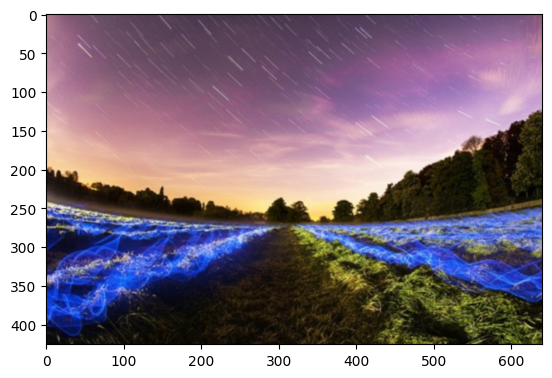

In [6]:
img = read_ppm('./sample.ppm')
filter = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]]) / 16  # Filtro de suavização Gaussiano 3x3
filtered_img = apply_filter(img, filter)
#write_ppm('output.ppm', filtered_img)

plt.imshow(filtered_img)
plt.plot()

# Questao 2

Usando a funcao da questao 1, pesquise um filtro passa-alta e aplique-o em 3 imagens distintas, variando o valor de n em 3 unidades em cada imagem. O que acontece quando n cresce?

In [7]:
filtro_passa_alta_3x3 = np.array([[-1, -1, -1],
                                  [-1,  8, -1],
                                  [-1, -1, -1]])

filtro_passa_alta_6x6 = np.ones((6, 6)) * -1
filtro_passa_alta_6x6[2:4, 2:4] = 8

filtro_passa_alta_9x9 = np.ones((9, 9)) * -1
filtro_passa_alta_9x9[3:6, 3:6] = 8

In [8]:
'''
print(filtro_passa_alta_3x3)
print()
print(filtro_passa_alta_6x6)
print()
print(filtro_passa_alta_9x9)
'''

'\nprint(filtro_passa_alta_3x3)\nprint()\nprint(filtro_passa_alta_6x6)\nprint()\nprint(filtro_passa_alta_9x9)\n'

In [9]:
def apply_filters(img, filters):
    filtered_imgs = []
    for name, filter in filters.items():
        filtered_imgs.append(apply_filter(img, filter))
        #write_ppm(f'{name}.ppm', filtered_img)
    return filtered_imgs

## !!! Problema aq, provavelmente por conta de valores negativos !!!

In [10]:
img = read_ppm('./sample.ppm')

filters = {"filtro_passa_alta_3x3": filtro_passa_alta_3x3,
           "filtro_passa_alta_6x6": filtro_passa_alta_6x6,
           "filtro_passa_alta_9x9": filtro_passa_alta_9x9}

apply_filters(img, filters)

[array([[[ 13,  13,  13],
         [245, 245, 239],
         [240, 240, 246],
         ...,
         [255,  13,   6],
         [255, 245, 250],
         [247, 247, 247]],
 
        [[  9,   9,   9],
         [253, 253, 247],
         [253, 253,   3],
         ...,
         [ 13,  13,  13],
         [  1, 252, 255],
         [245, 251, 249]],
 
        [[  1,   1,   1],
         [  4,   4, 254],
         [ 12,  12,  18],
         ...,
         [255,   8,   4],
         [248, 253, 252],
         [ 12,   0,   4]],
 
        ...,
 
        [[196, 189, 208],
         [ 82,  92,  90],
         [147, 138, 142],
         ...,
         [183, 193, 186],
         [ 69,  76, 212],
         [131, 134,  66]],
 
        [[245, 247, 237],
         [  3,  13, 254],
         [244, 235, 242],
         ...,
         [ 37,  38, 204],
         [149, 156,  84],
         [ 91,  93,  47]],
 
        [[247, 247, 247],
         [  3,  12,   3],
         [ 12,   3,  12],
         ...,
         [ 37,  41, 213],
  

R:

Quanto maior o filtro, mais pixels vizinhos ele considera, e mais ele começará a realçar detalhes de maior escala na imagem, realçando também bordas e detalhes finos.

# Questao 3

Usando a funcao da questao 1, pesquise um filtro passa-baixa e aplique-o em 3 imagens distintas, variando o valor de n em 3 unidades em cada imagem. O que acontece quando n cresce?

In [11]:
filtro_passa_baixa_3x3 = np.ones((3, 3)) / 9
filtro_passa_baixa_6x6 = np.ones((6, 6)) / 36
filtro_passa_baixa_9x9 = np.ones((9, 9)) / 81

In [12]:
'''
print(filtro_passa_baixa_3x3)
print()
print(filtro_passa_baixa_6x6)
print()
print(filtro_passa_baixa_9x9)
'''

'\nprint(filtro_passa_baixa_3x3)\nprint()\nprint(filtro_passa_baixa_6x6)\nprint()\nprint(filtro_passa_baixa_9x9)\n'

In [13]:
img = read_ppm('./sample.ppm')

filters = {"filtro_passa_baixa_3x3": filtro_passa_baixa_3x3,
           "filtro_passa_baixa_6x6": filtro_passa_baixa_6x6,
           "filtro_passa_baixa_9x9": filtro_passa_baixa_9x9}

apply_filters(img, filters)

[array([[[176, 128, 142],
         [174, 126, 140],
         [171, 123, 139],
         ...,
         [125,  91, 116],
         [124,  89, 114],
         [123,  87, 112]],
 
        [[176, 129, 143],
         [175, 127, 142],
         [173, 125, 140],
         ...,
         [125,  91, 116],
         [124,  89, 115],
         [124,  87, 113]],
 
        [[177, 129, 143],
         [176, 128, 143],
         [174, 126, 142],
         ...,
         [126,  91, 116],
         [125,  89, 115],
         [125,  87, 114]],
 
        ...,
 
        [[  6,   8,   5],
         [  7,   8,   6],
         [ 15,  15,  12],
         ...,
         [ 50,  59,   7],
         [ 59,  69,  14],
         [ 78,  89,  28]],
 
        [[  5,   7,   3],
         [  6,   7,   4],
         [ 10,  10,   7],
         ...,
         [ 50,  59,   5],
         [ 66,  76,  19],
         [ 81,  92,  29]],
 
        [[  4,   7,   2],
         [  6,   7,   3],
         [  7,   7,   4],
         ...,
         [ 58,  67,   9],
  

R:

Quanto maior o filtro, mais pixels vizinhos ele considera, e mais ele começará a suavizar detalhes de maior escala na imagem, suavizando também detalhes finos.

# Questao 4

Um filtro passa-baixa bastante conhecido e o filtro Gaussiano. Atraves de uma mascara determinada por um desvio padrao σ, e possıvel fazer o que chamamos de suavizacao gaussiana de uma imagem. Considere o filtro 5x5 de desvio padrao unitario abaixo:

g =

1/273 4/273 7/273 4/273 1/273

4/273 16/273 26/273 16/273 4/273

7/273 26/273 41/273 26/273 7/273

4/273 16/273 26/273 16/273 4/273

1/273 4/273 7/273 4/273 1/273

Crie uma imagem I de dimensoes 100 × 100 que contem um unico valor nao nulo localizado no centro da imagem. Utilizando o filtro gaussiano acima, calcule e exiba I ∗ g, onde ∗ e a notacao para o operador de convolucao.

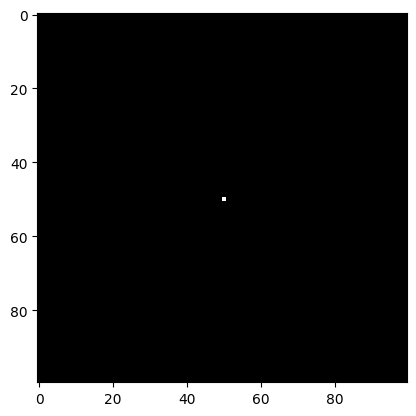

In [14]:
l = np.zeros((100, 100))
l[50][50] = 255

plt.imshow(l, cmap='gray')
plt.show()

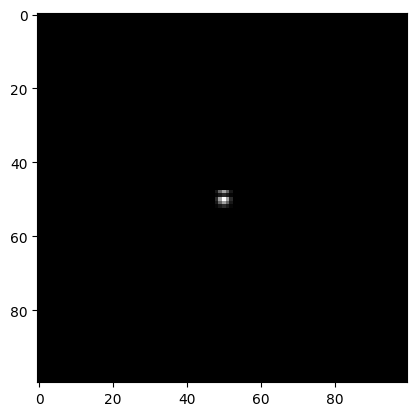

In [15]:
g = np.array([[1/273, 4/273, 7/273, 4/273, 1/273],
               [4/273, 16/273, 26/273, 16/273, 4/273],
               [7/273, 26/273, 41/273, 26/273, 7/273],
               [1/273, 4/273, 7/273, 4/273, 1/273],
               [4/273, 16/273, 26/273, 16/273, 4/273]])

filtered_img = apply_filter(l, g)
plt.imshow(filtered_img, cmap='gray')
plt.show()

# Questao 5

Pesquise e implemente um filtro para remocao de ruıdos que nao possa ser representado com convolucoes.

# Questao 6

Aplique o detector de canny usando a funcao Canny() da OpenCV em uma ou mais imagens de sua escolha. Experimente variar cada um dos parametros threshold1, threshold2 e apertureSize. Explique com suas palavras a influencia de cada parametro no resultado.

4.8.1


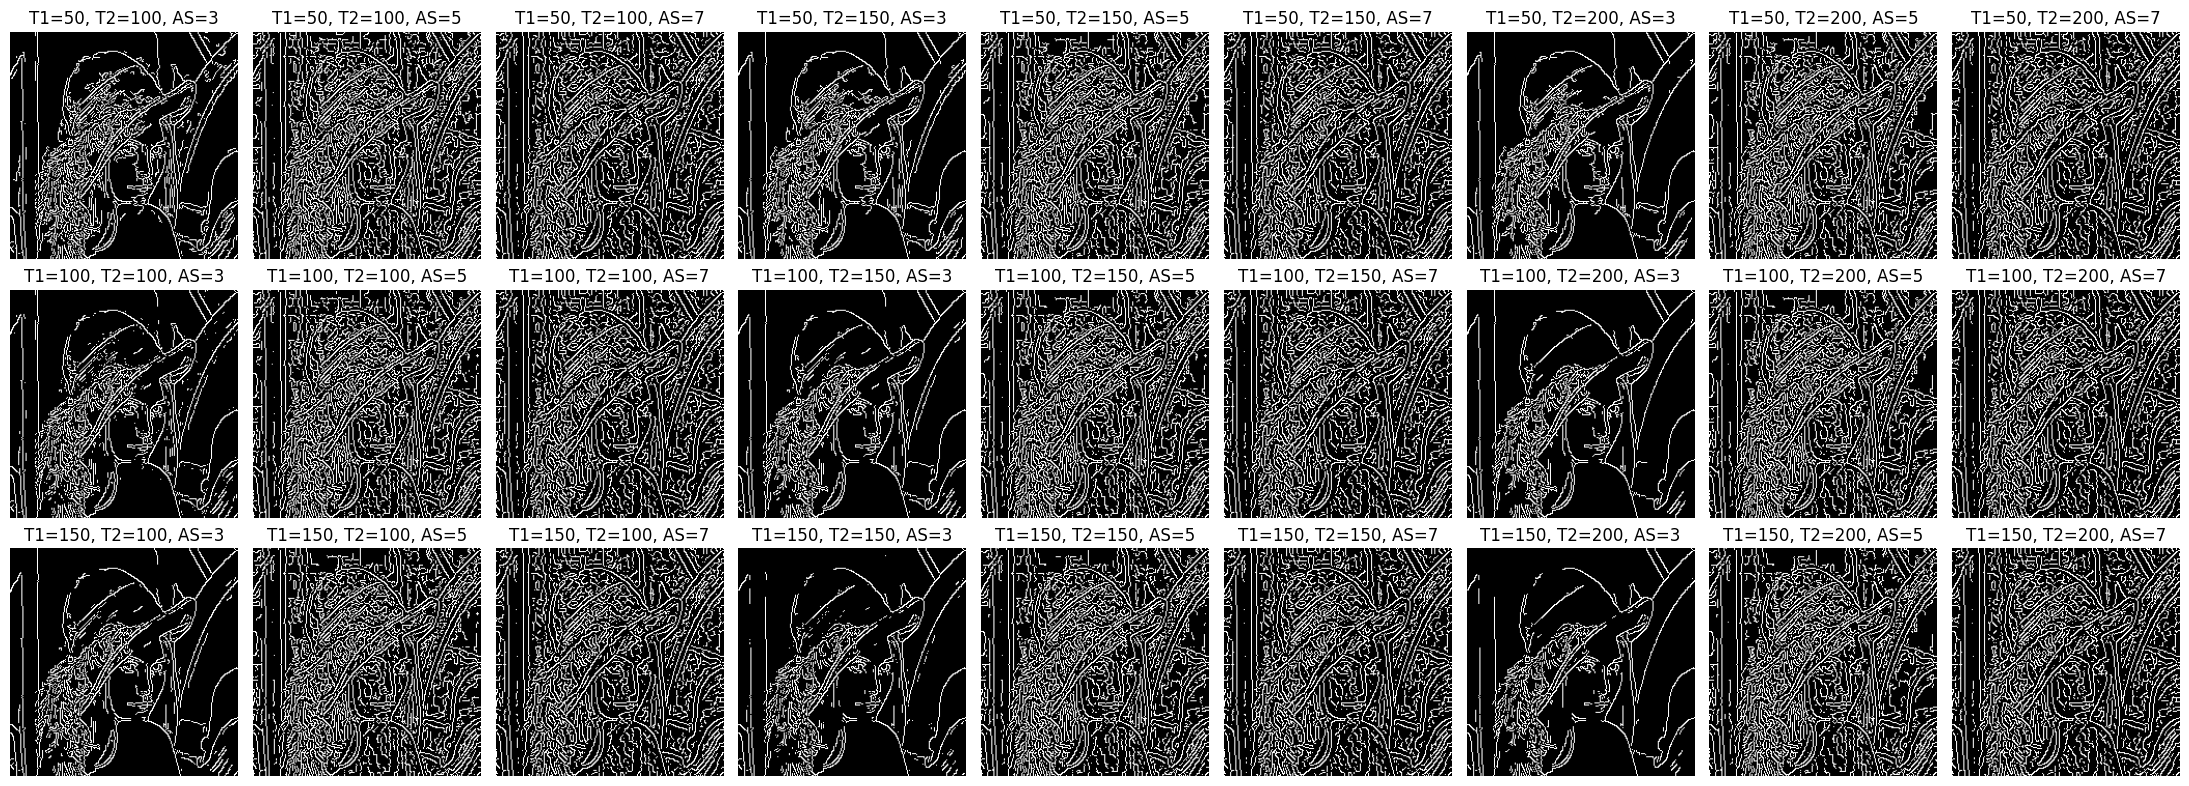

In [68]:
import cv2
print(cv2.__version__)

img = cv2.imread('lena.jpeg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Vary the parameters for edge detection
threshold1_values = [50, 100, 150]
threshold2_values = [100, 150, 200]
aperture_values = [3, 5, 7]

# Create subplots
fig, axs = plt.subplots(len(threshold1_values), len(threshold2_values) * len(aperture_values), 
                        figsize=(22, 8))

# Iterate through parameter combinations
for i, threshold1 in enumerate(threshold1_values):
    for j, threshold2 in enumerate(threshold2_values):
        for k, aperture_size in enumerate(aperture_values):
            # Apply Canny edge detection
            edges = cv2.Canny(gray, threshold1, threshold2, apertureSize=aperture_size)

            # Display the results
            axs[i, j * len(aperture_values) + k].imshow(edges, cmap='gray')
            axs[i, j * len(aperture_values) + k].set_title(f'T1={threshold1}, T2={threshold2}, AS={aperture_size}')
            axs[i, j * len(aperture_values) + k].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


O threshold1 é o menor limiar, o que significa que qualquer gradiente abaixo dele não será considerado borda. Assim, aumentá-lo fará com que o detector de Canny rejeite mais bordas. Já o threshold2 é o limiar maior; os gradientes serão aceitos como bordas se forem maiores que ele, de modo que aumentá-lo fará com que o detector de Canny encontre menos bordas.

Aumentar o threshold2 significa que para ser considerado borda o gradiente precisa ser muito intenso. Já aumentar o threshold1 trará maior rejeição de bordas.

Aumentar apertureSize pode ajudar a suavizar o ruído, mas também pode fazer com que o detector de Canny perca bordas finas, já que vai estar considerando uma janela maior ao calcular os gradientes.


# Questao 7

Escolha uma imagem interessante e gere uma piramide aplicando sucessivamente downsampling 3 vezes com fator 1/2. Faca o mesmo com uma piramide gaussiana e compare os resultados. Mostre os resultados de cada piramide em uma  ́unica imagem lado a lado, como no slides 20 (vai exigir algumas operacoes de translacao de imagens). Obs.: aqui voce pode usar funcoes do OpenCV.

In [ ]:
def translate_image(img, dx, dy):
    (h, w) = img.shape[:2]
    translated_image = np.zeros_like(img)
    translated_image[dy:h, dx:w] = img[0:h-dy, 0:w-dx]
    return translated_image

# Questao 8

Usando a funcao da questao 1, crie funcoes que apliquem filtros para calcular as imagens representando ∂f∂x ,
∂f∂y e |∇f|. Em seguida, implemente o operador de Sobel usando estas imagens como entrada. Exiba cada um desses resultados para tres imagens distintas.